# Cодержанние
- [1. Изучение данных из файла](#1.-Изучение-данных-из-файлов)
    - [1.1 Вывод](#1.1-Вывод)
- [2. Предобработка данных](#2.-Предобработка-данных)
    - [2.1 Замена типа данных](#2.1-Замена-типа-данных)
    - [2.2 Вывод](#2.2-Вывод)
- [3. Функции для расчета и анализа LTV, ROI, удержания и конверсии](#3.-Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии)
    - [3.1 Вывод](#3.1-Вывод)
- [4. Исследовательский анализ данных](#4.-Исследовательский-анализ-данных)
    - [4.1 Вывод](#4.1-Вывод)  
- [5. Маркетинг](#5.-Маркетинг)
    - [5.1 Вывод](#5.1-Вывод)
- [6. Оцените окупаемость рекламы](#6.-Оцените-окупаемость-рекламы)
    - [6.1 Вывод](#6.1-Вывод)    
- [7. Общий вывод](#7.-Общий-вывод)    

**Цели исследования:**

Ответим на следующие вопросы:
1. Откуда приходят пользователи и какими устройствами они пользуются;
2. Сколько стоит привлечение пользователей из различных рекламных каналов;
3. Cколько денег приносит каждый клиент;
4. Когда расходы на привлечение клиента окупаются;
5. Какие факторы мешают привлечению клиентов;

**Ход исследования:**

1. Изучим данные
2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии
3. Проведем исследовательский анализ данных
    - Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей
    - Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
    - Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
    - Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
4. Маркетинг
    - Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени
    - Узнайем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей
5. Оцените окупаемость рекламы
    - Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    - Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    - Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам
    - Ответьте на такие вопросы:
        1. Окупается ли реклама в целом?
        2. Какие устройства, страны и каналы могут снижать окупаемость рекламы?
        3. Чем могут быть вызваны проблемы окупаемости?
6. Напишим выводы
    - Выделим причины неэффективности привлечения пользователей

## 1. Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
except FileNotFoundError as e:
    print(e)
    games_df = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
try:
    orders = pd.read_csv('orders_info_short.csv')
except FileNotFoundError as e:
    print(e)
    games_df = pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
try:
    costs = pd.read_csv('costs_info_short.csv')
except FileNotFoundError as e:
    print(e)
    games_df = pd.read_csv('/datasets/costs_info_short.csv')

In [5]:
for df,name in zip([visits, orders, costs], 
                   ['visits', 'orders', 'costs']):
    df.name = name
    print('_' * 35 + f'{df.name}' + '_' * 35)
    display(df.head())
    print('-' * 75)
    print(df.isna().sum())
    print('-' * 75)
    df.info()

___________________________________visits___________________________________


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


---------------------------------------------------------------------------
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
___________________________________orders___________________________________


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


---------------------------------------------------------------------------
User Id     0
Event Dt    0
Revenue     0
dtype: int64
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
___________________________________costs___________________________________


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


---------------------------------------------------------------------------
dt         0
Channel    0
costs      0
dtype: int64
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Взгянув на сырые данные обнаружили следующие проблемы:
1. Неправильный формат столбцов с датами

### 1.1 Вывод

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но прежде чем двигаться дальше, нужно заменить формат столбцов с датами

## 2. Предобработка данных

Заменим заглавные буквы и пробелы в названиях столбцов

In [6]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

### 2.1 Замена типа данных

Заменим тип данных на datetime в столбцах с датами

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # поскольку в dt у нас нет данных о времени, сразу приводим его к date

### 2.2 Вывод

Исправили выявленные недочеты, может приступать к следующему шагу

## 3. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Для создания пользовательских профилей с датой первого посещения и источником перехода на сайт напишем функцию `get_profiles()`. В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию `first()`:

In [8]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также функции для визуализации этих метрик — `filter_data()`, `plot_retention()`, `plot_conversion()` и `plot_ltv_roi()`.

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


In [15]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


## 4. Исследовательский анализ данных

- Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей

In [16]:
min_data_costs = costs["dt"].min()
max_data_costs = costs["dt"].max()

In [17]:
print(f'Самая раняя дата привлечения {min_data_costs}')
print(f'Самая поздняя дата привлечения {max_data_costs}')

Самая раняя дата привлечения 2019-05-01
Самая поздняя дата привлечения 2019-10-27


- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [18]:
profiles = get_profiles(visits, orders, events=None, ad_costs=costs)

In [19]:
#Сгруппируем по региону и посчитаем количество уникальных пользователей и количество платящих пользователей
#Далее посчитаем процент платящих пользователей
by_region =  profiles.groupby('region').agg({'user_id':'nunique', 'payer':'sum'})
by_region['%'] = by_region['payer'] / by_region['user_id']
by_region.columns = ['user', 'paying_users', '%']
by_region = by_region.sort_values(by='user', ascending=False)
by_region.style.format({'%':'{:.2%}'})

,user,paying_users,%
region,,,
United States,100002,6902,6.90%
UK,17575,700,3.98%
France,17450,663,3.80%
Germany,14981,616,4.11%


- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [20]:
by_device =  profiles.groupby('device').agg({'user_id':'nunique', 'payer':'sum'})
by_device['%'] = by_device['payer'] / by_device['user_id']
by_device.columns = ['user', 'paying_users', '%']
by_device = by_device.sort_values(by='user', ascending=False)
by_device.style.format({'%':'{:.2%}'})

,user,paying_users,%
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%
Mac,30042,1912,6.36%


- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

In [21]:
by_channel =  profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'sum'})
by_channel['%'] = by_channel['payer'] / by_channel['user_id']
by_channel.columns = ['user', 'paying_users', '%']
by_channel = by_channel.sort_values(by='user', ascending=False)
by_channel.style.format({'%':'{:.2%}'})

,user,paying_users,%
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
LeapBob,8553,262,3.06%
WahooNetBanner,8553,453,5.30%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


### 4.1 Вывод


Лидером по количеству пользователей и количеству платящих пользователей являестся США далее идет Великобритания и Франция.
Чаще в приложение Procrastinate Pro+ заходять с iPhone далее идет Android, ПК и MAC

В нашем распоряжении период проведения рекламных компаний в отрезке от 1 мая 2019 по 27 октября того же года.


В целом, можно сказать что нашему приложению большую прибыль приносит североамериканский рынок так как там больший процент платящих пользовтелей. Так же большую прибыль приносят пользователи устройств компании apple(iphone, MAC) в отличии от других платформ

Видим что большую часть новых пользователей приходят "органическим" путём, но в этом притоке пользователей меньше всего платящих в отличии от других источников привлечения пользователей. Связанно это скорей всего с тем что при не органическом(контекстная реклама, таргетированная реклама, рекламные интеграции и т.п.) привлечении пользователей, используются разные скидки или бонусы или разного рода подарки.

## 5. Маркетинг

- Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени

In [22]:
print(f'Общая сумма затрат на рекламную компанию за предоставленный нам период равна {int(costs["costs"].sum())}')

Общая сумма затрат на рекламную компанию за предоставленный нам период равна 105497


Построим диаграму распределения расходов по источникам

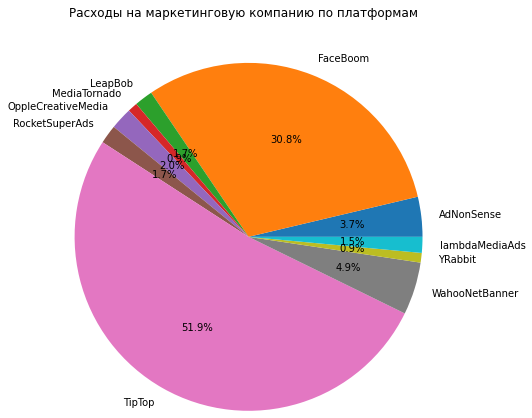

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


In [23]:
channel = pd.pivot_table(costs, index='channel', values='costs', aggfunc='sum').reset_index()

plt.suptitle(f'Расходы на маркетинговую компанию по платформам', y=1.3)
plt.pie(channel['costs'], labels=channel['channel'], autopct='%1.1f%%', radius=2, center=(0, 2))
plt.show()

display(channel.sort_values(by='costs', ascending=False).reset_index(drop=True))#.head())

Визуализируем изменения метрик во времени

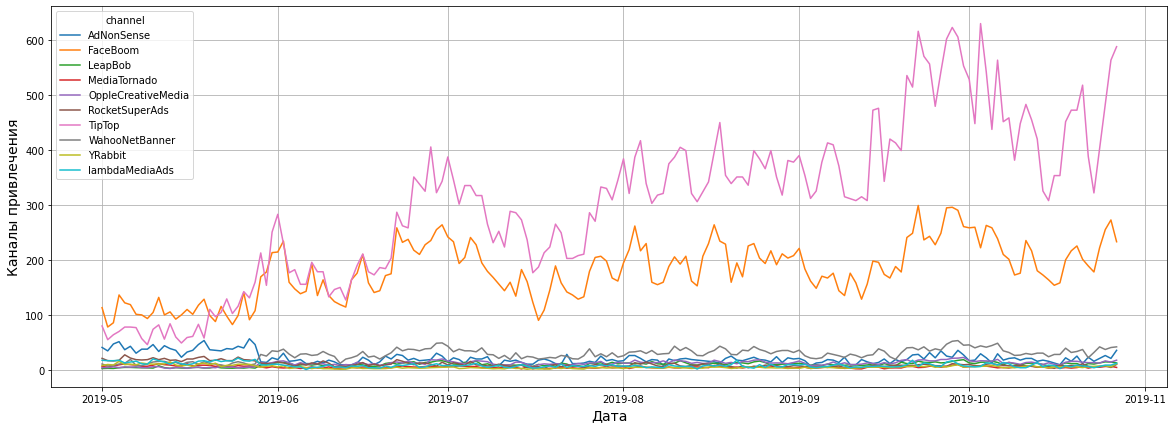

In [24]:
pd.pivot_table(costs, index='dt', columns='channel', values='costs', aggfunc='sum').plot(figsize=(20,7), grid=True)
plt.xlabel('Дата', size=14)
plt.ylabel('Каналы привлечения', size=14)
plt.show()

- Узнайем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей

In [25]:
profiles_CAC = get_profiles(visits, orders, events=None, ad_costs=costs)
#Исключем органических пользователей
report_CAC = (
    profiles_CAC.query('channel != "organic"').groupby('channel').agg({'user_id':'nunique', 'acquisition_cost':'mean'})
    .sort_values(by='user_id', ascending=False)
)
report_CAC = report_CAC.rename(columns={'user_id':'пользователи', 'acquisition_cost':'Средняя стоитмость привлечения, $'})
report_CAC.style.format({'Средняя стоитмость привлечения, $':'{:.2f}'})

,пользователи,"Средняя стоитмость привлечения, $"
channel,,
FaceBoom,29144,1.11
TipTop,19561,2.80
OppleCreativeMedia,8605,0.25
LeapBob,8553,0.21
WahooNetBanner,8553,0.60
RocketSuperAds,4448,0.41
MediaTornado,4364,0.22
YRabbit,4312,0.22
AdNonSense,3880,1.01


### 5.1 Вывод

Всего на маркетинговую компанию было потрачено 105.497, больше всего было вложено в платформы TipTop (54.751) и FaceBoom (32.445) и эти же платформы являются лидерами по привлеченным пользователям

Самыми "дешевыми" по средней стоитмости привлечения являются платформы LeapBob (0.21), MediaTornado (0.22) и YRabbit (0.22)

## 6. Оцените окупаемость рекламы

- Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим 2-х недельный горизонт анализа.

In [26]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 7  # горизонт анализа

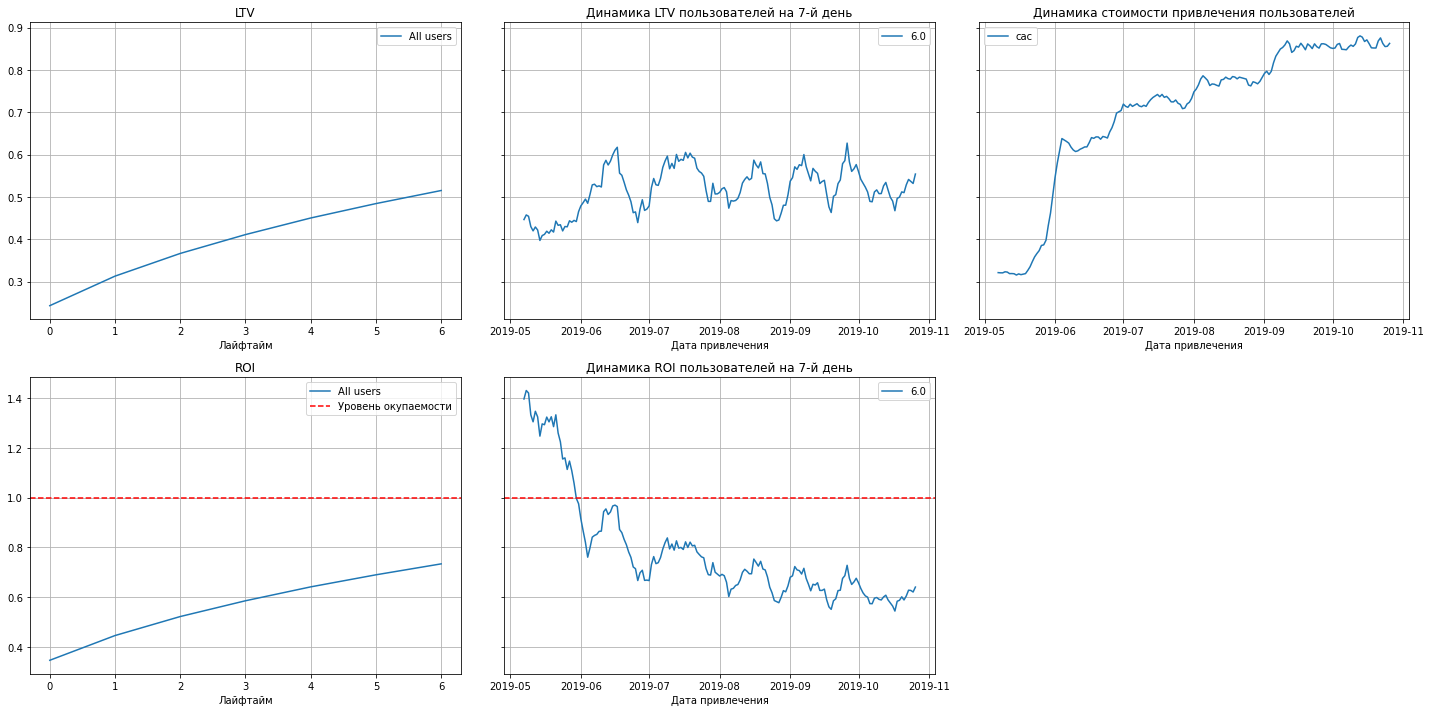

In [27]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

1. На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
2. Видим рост CAС. Дело наверно в увеличении рекламного бюджета.
3. Реклама не окупается и так же видим падение ROI 

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения

- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

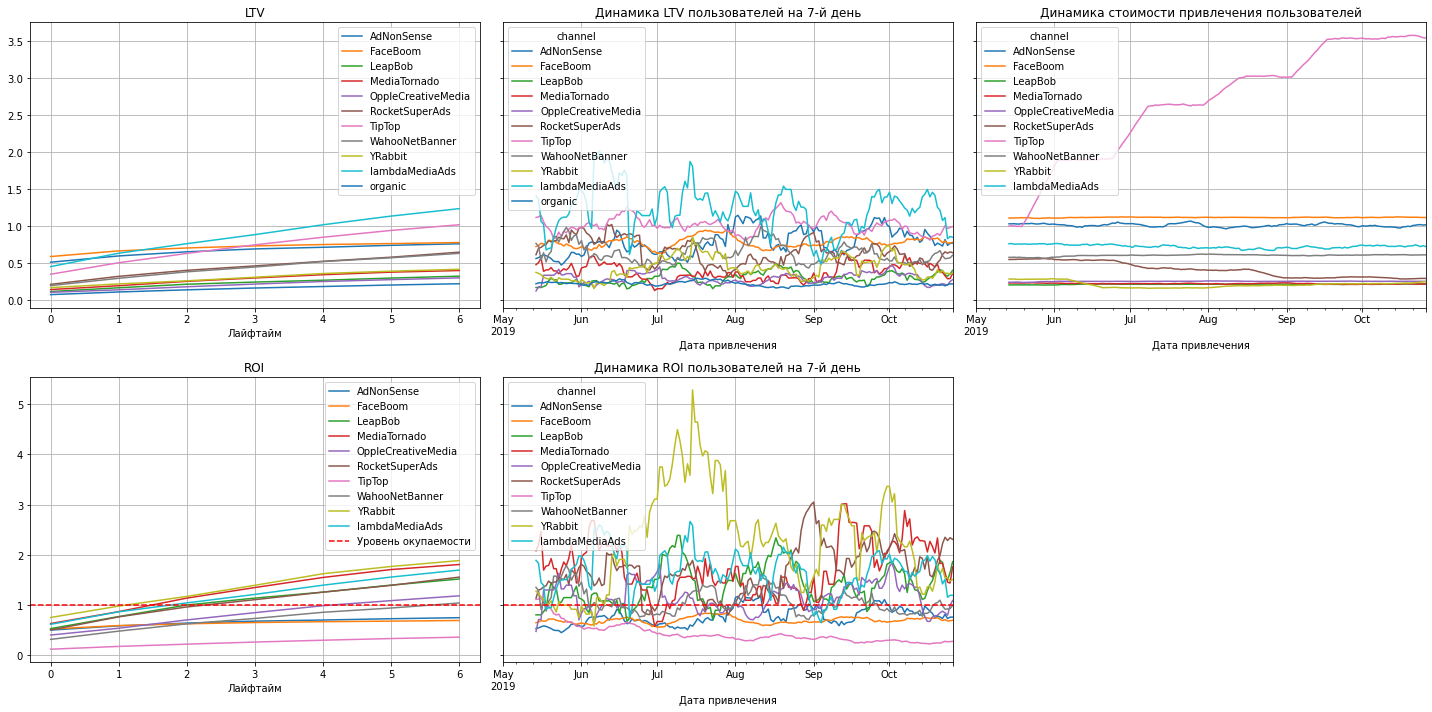

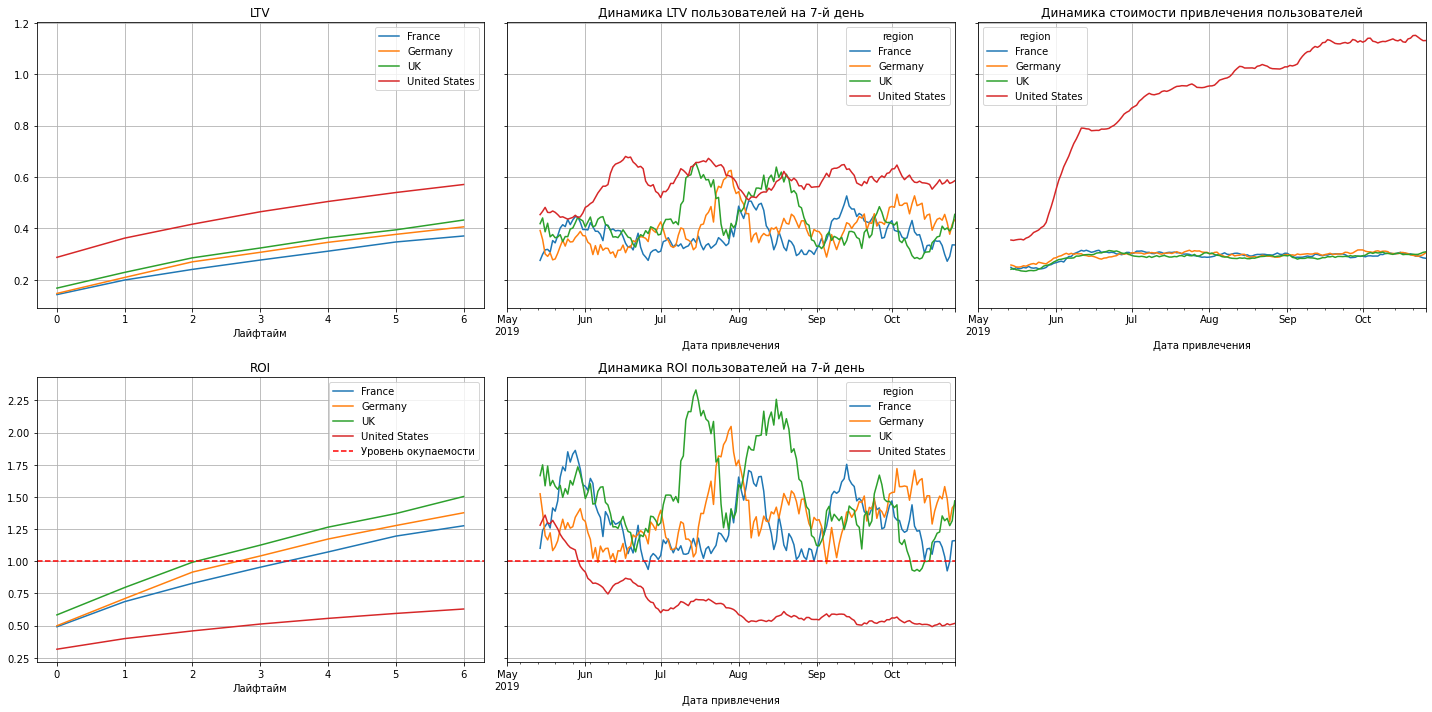

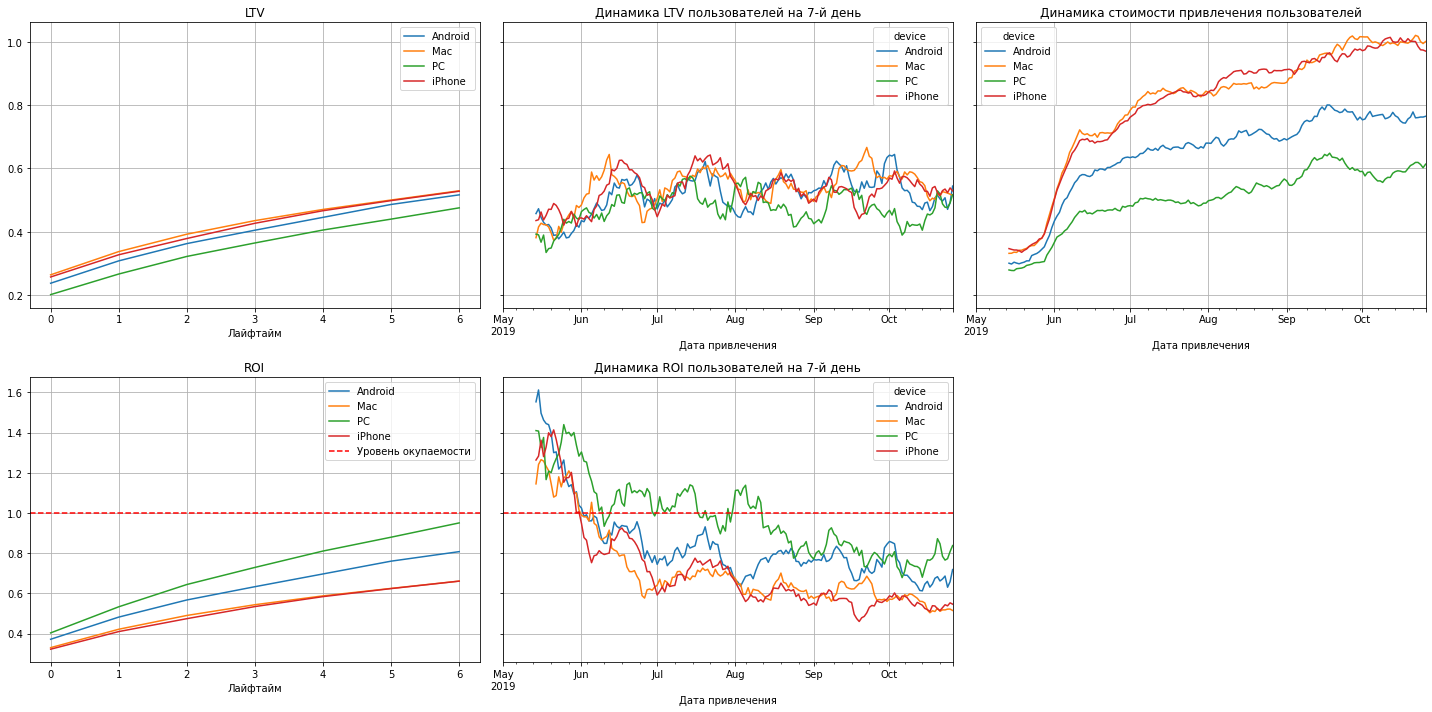

In [28]:
# смотрим окупаемость с разбивкой по источникам привлечения, по регионам и по девайсам

dimensions_list = ['channel', 'region', 'device']

for dimension in dimensions_list:
    dimensions = [dimension]
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles, orders, observation_date, horizon_days, dimensions=dimensions
    )

    plot_ltv_roi(
        ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
    ) 

Платформы:
1. LTV по всем платформам стабилен
2. САС по всем платформам стабилен кроме платформы TipTop, у данной плаформы видим большой рост стоимости привлечения
3. Большинство платформ окупаются


Регионы:
1. Видим резкий рост стоимости привлечения пользователей из США 
2. Так же пользователи из США не окупаются

- Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

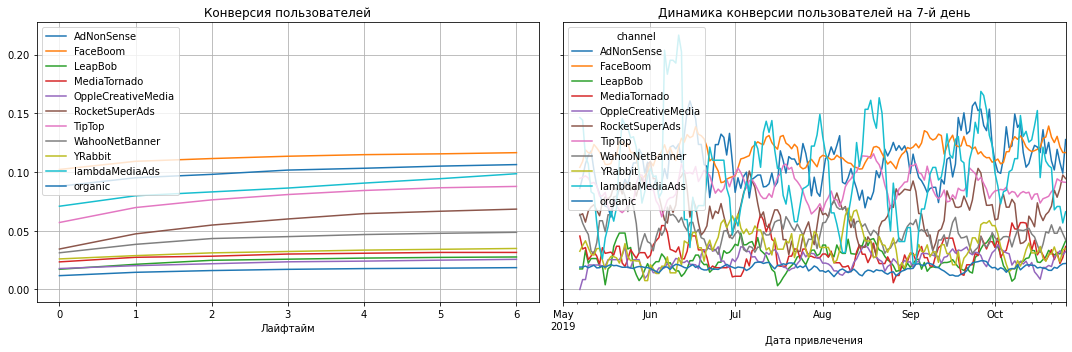

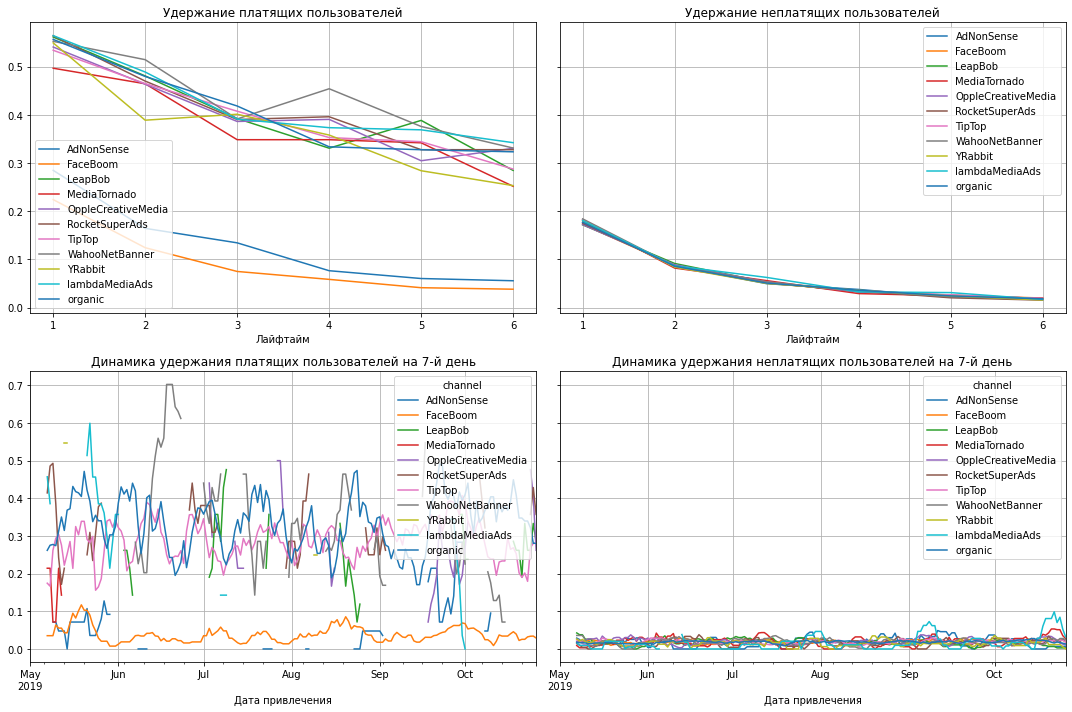

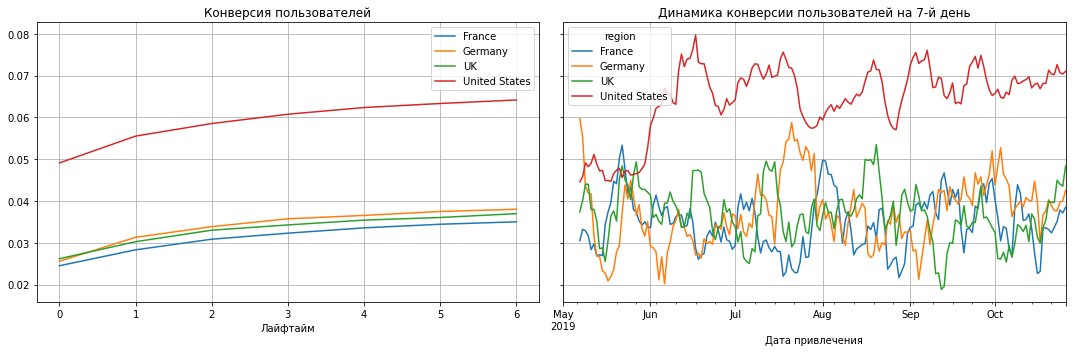

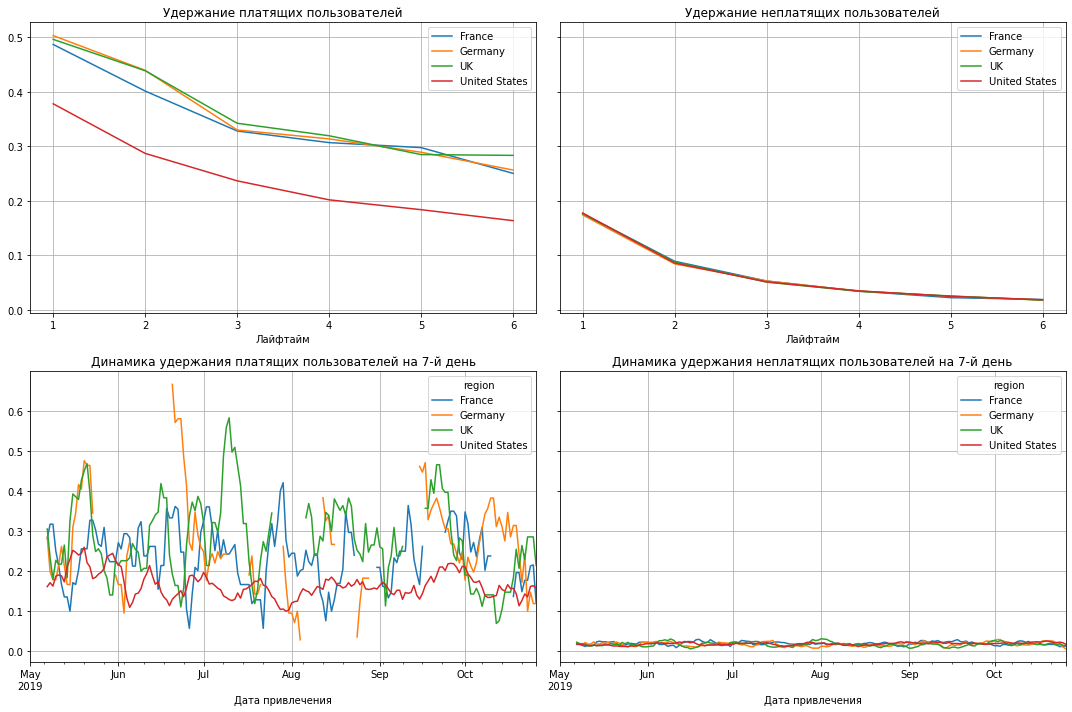

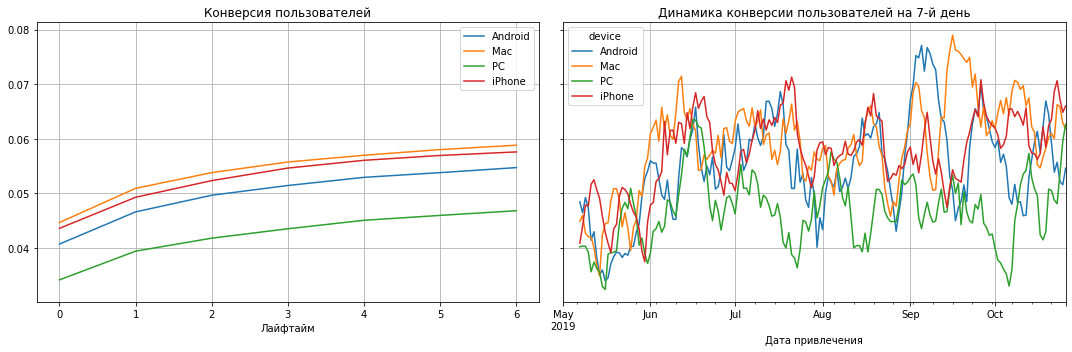

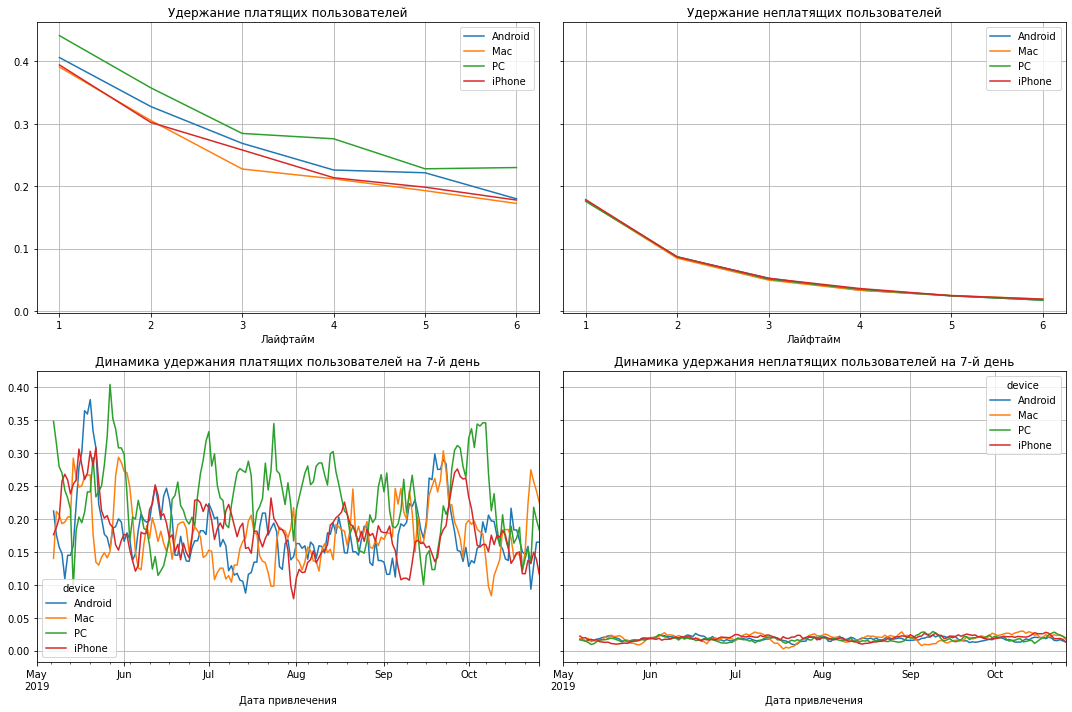

In [29]:
for dimension in dimensions_list:
    dimensions = [dimension]
    
    # смотрим конверсию
    conversion_raw, conversion_grouped, conversion_history = get_conversion(
        profiles, orders, observation_date, horizon_days, dimensions=dimensions
    )
    plot_conversion(conversion_grouped, conversion_history, horizon_days) 

    # смотрим удержание
    retention_raw, retention_grouped, retention_history = get_retention(
        profiles, visits, observation_date, horizon_days, dimensions=dimensions
    )
    plot_retention(retention_grouped, retention_history, horizon_days) 

Платформы:
- Удержание платящих пользователей платформы FaceBoom на уровне органически привлеченных пользователей
Регионы:
- Высокая конверсия у пользователей из США, в отличии от других регионов
- Низкие показатели удержания платящих пользователей из США

Из всех выше представленых графиков можно предположить, что проблема убытков компании могут быть из за пользователей из США.Расмотрим этот регион отдельно

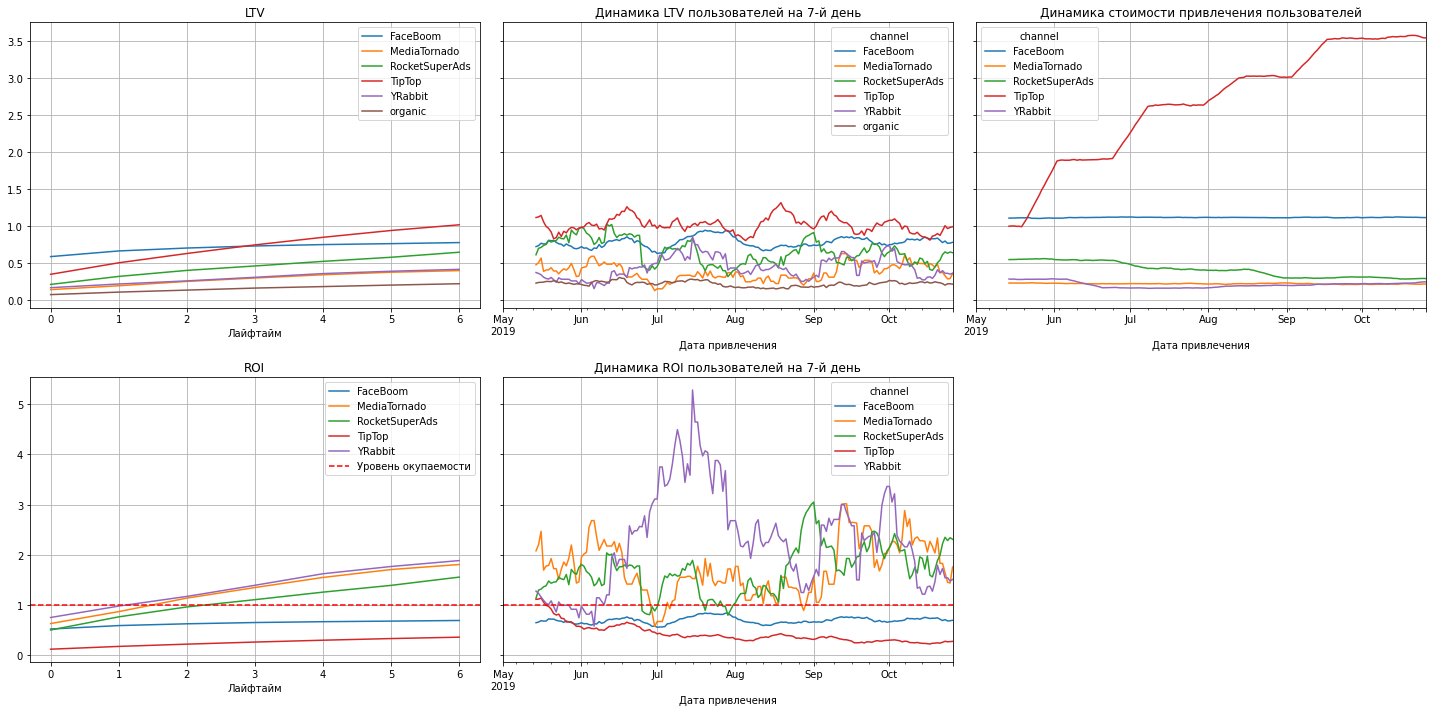

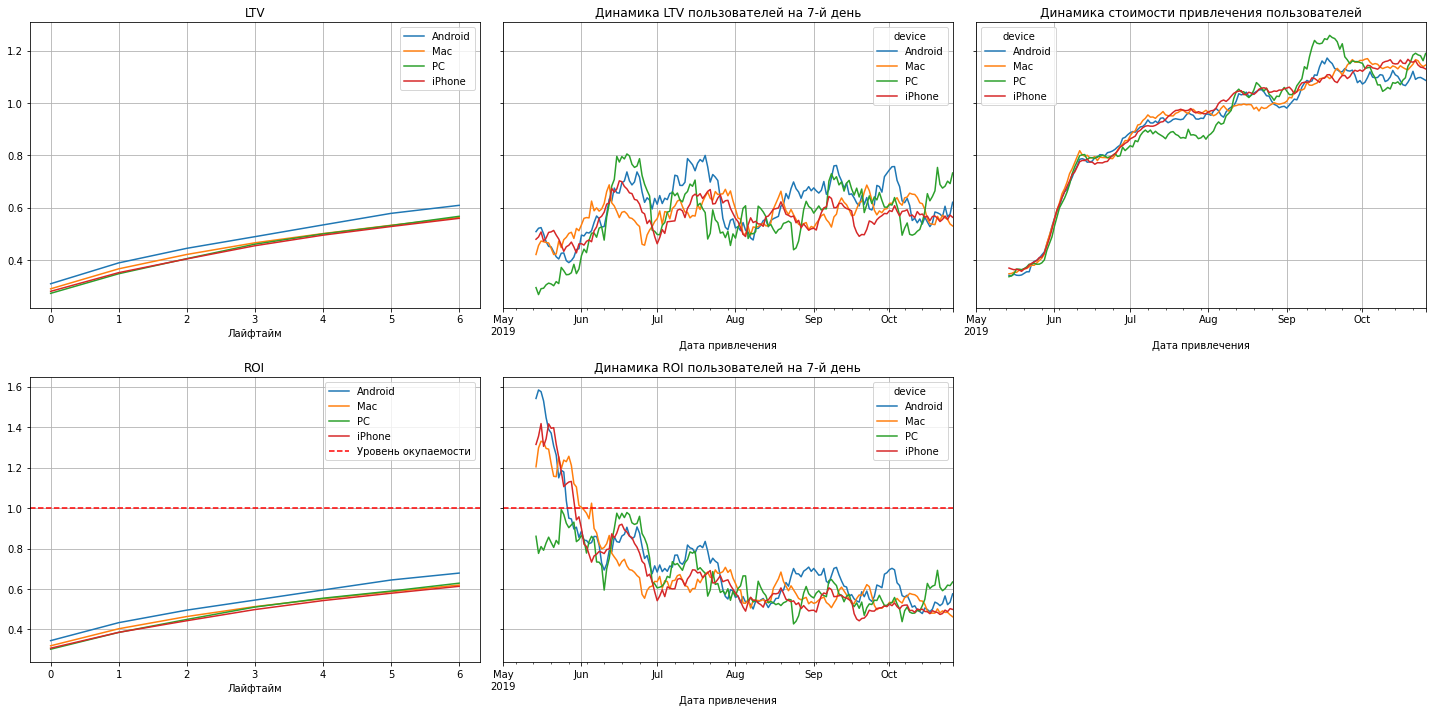

In [30]:
# смотрим окупаемость с разбивкой по источникам привлечения и по девайсам в США

profiles_USA = profiles.query('region == "United States"')
dimensions_list = ['channel', 'device']

for dimension in dimensions_list:
    dimensions = [dimension]
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
    )

    plot_ltv_roi(
        ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
    ) 

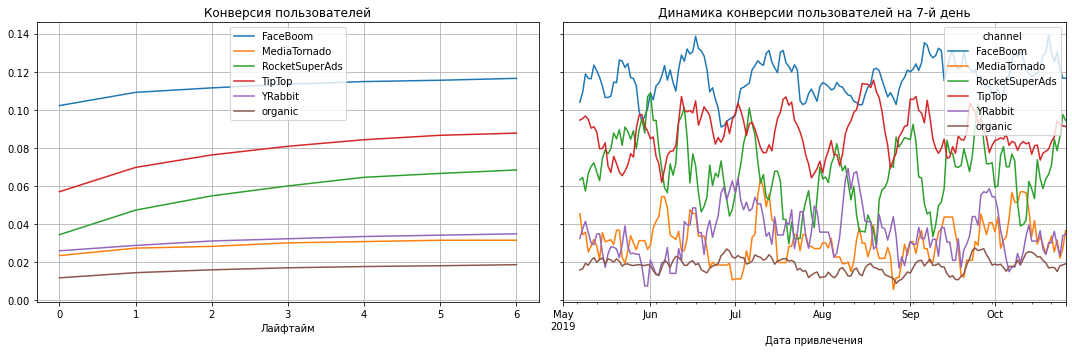

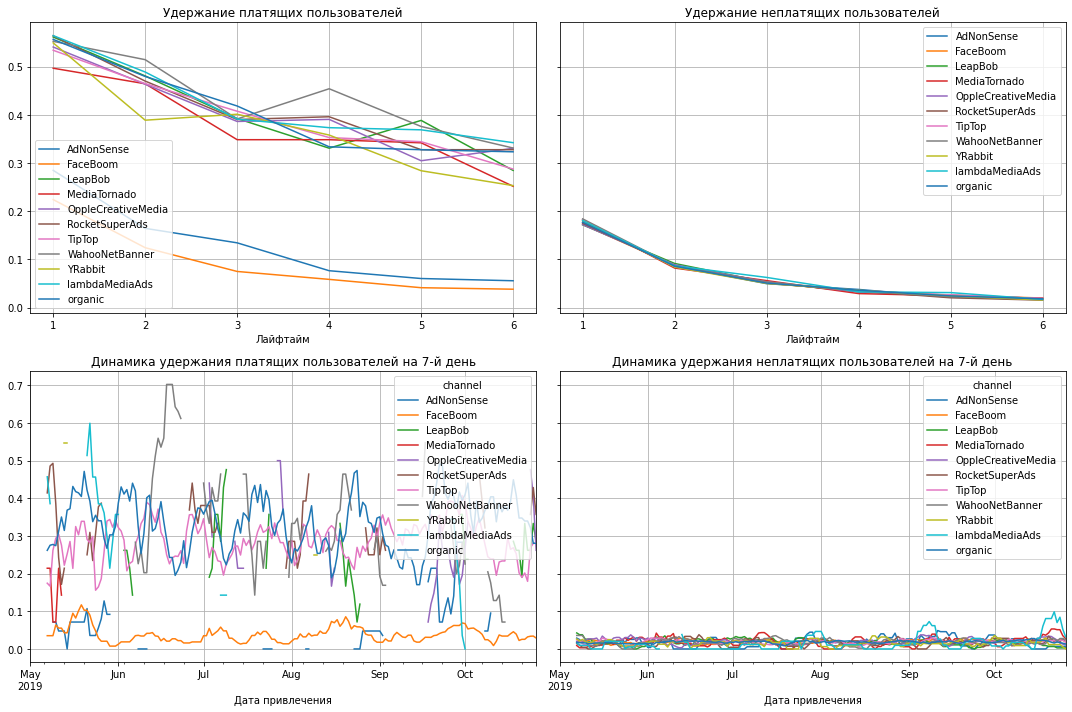

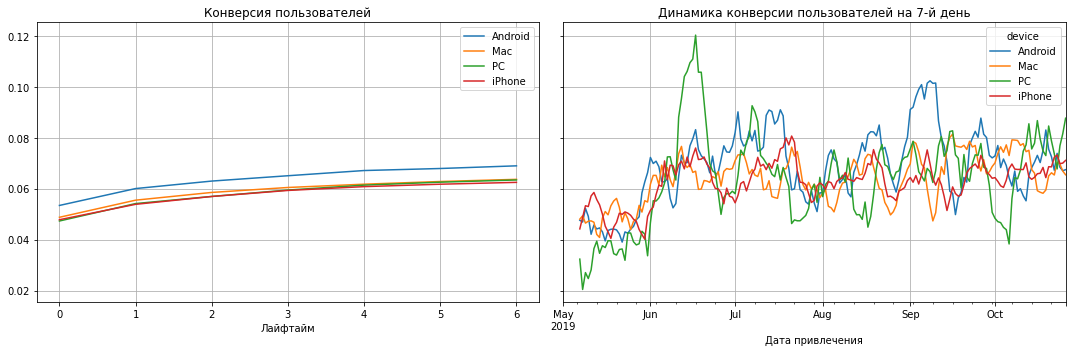

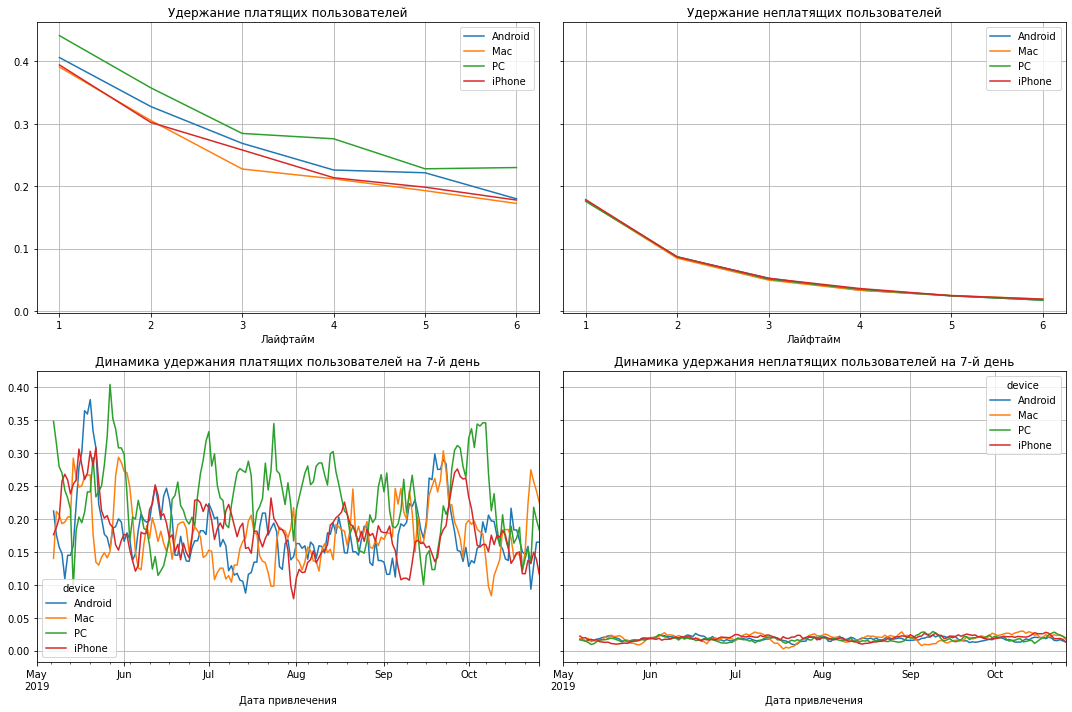

In [31]:
for dimension in dimensions_list:
    dimensions = [dimension]
    
    # смотрим конверсию
    conversion_raw, conversion_grouped, conversion_history = get_conversion(
        profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
    )
    plot_conversion(conversion_grouped, conversion_history, horizon_days) 

    # смотрим удержание
    retention_raw, retention_grouped, retention_history = get_retention(
        profiles, visits, observation_date, horizon_days, dimensions=dimensions
    )
    plot_retention(retention_grouped, retention_history, horizon_days)

В целом графике по США не отличаются от всей выборки так как пользователей из этого региона примерно 67%. Скорей всего проблемы в платформах, а имено TipTop и FaceBoom
1. TipTop
    - Высокая стоимость привлечения пользователей 
2. FaceBoom
    - Низкий уровень удержания платящих пользователей

In [32]:
# Посмотрим в каких регионах работают платформы FaceBoom и TipTop
profiles.query('(channel == "FaceBoom") or (channel == "TipTop")')['region'].unique()

array(['United States'], dtype=object)

Ответьте на такие вопросы:
1. Окупается ли реклама в целом?
    - В целом если исключить "проблемнный" регион, а конкретнее платформы работающии на этот регион, то маркетинговая компания окупается(судя по графику ROI по регионам)
2. Какие устройства, страны и каналы могут снижать окупаемость рекламы?
    - Как сказано ранее возможно снижают окупаемость рекламы - платформы FaceBoom и TipTop 
3. Чем могут быть вызваны проблемы окупаемости?
    - Стоимость привлечения пользователей, уровень удержания платящих пользователей

### 6.1 Вывод

После оценки окупаемости рекламы можно предположить что снижение окупаемости рекламы произошло из за платформ FaceBoom и TipTop

## 7. Общий вывод



1. Выделим причины неэффективности привлечения пользователей
    - Низкий ROI двух платформ
2. Сформулируем рекомендации для отдела маркетинга
    - Высокая стоимость привлечения пользователей(TipTop)
        1. Если есть возможность договориться о более дешевом трафике
        2. Пытаться увеличить конверсию путем предложения новым пользователям разных привелегий или скидок
        3. Искать другие платформы привлечения трафика
    - Низкий уровень удержания платящих пользователей(FaceBoom)
        1. Предложение платящим пользователям разных привелегий или скидок
        2. Искать другие платформы привлечения трафика